In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

import sklearn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import SGD

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score



2024-12-13 18:13:09.999418: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def cross_val_logistic_regression(X_scaled, Y, n_splits=3):
    # Initialize KFold
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    fold_results = []

    # Hyperparameter tuning with GridSearchCV
    clf = LogisticRegression(random_state=0, solver='liblinear')
    param_grid = {'C': [0.01, 0.1, 1, 10, 100]} 
    grid_search = GridSearchCV(clf, param_grid, cv=5)

    # Iterate through each fold
    for fold, (train_index, test_index) in enumerate(kf.split(X_scaled)):
        print(f"\nFold {fold + 1}")
        
        # Split data into train and test based on the KFold splits
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        # Fit the model using GridSearchCV to find the best parameters
        grid_search.fit(X_train, y_train.ravel())
        best_model = grid_search.best_estimator_

        # Predictions
        y_pred = best_model.predict(X_test)

        # Accuracy
        acc = accuracy_score(y_test, y_pred)
        fold_results.append(acc)
        print(f"Accuracy for Fold {fold + 1}: {acc * 100:.2f}%")

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        df_cm = pd.DataFrame(cm, index=['Healthy', 'Disease'], columns=['Healthy', 'Disease'])
        
        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sn.set(font_scale=1.2)
        sn.heatmap(df_cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 14})
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.title(f"Confusion Matrix - Fold {fold + 1}")
        plt.show()

        # Classification Report
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

    # Average accuracy across folds
    print(f"\nAverage Accuracy: {np.mean(fold_results) * 100:.2f}%")

    # Cross-Validation Scores across all folds
    cv_scores = cross_val_score(best_model, X_scaled, Y.ravel(), cv=n_splits)
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Average CV Score: {np.mean(cv_scores):.2f}")

**Heart Data**

In [3]:
file_path = "heart+disease/processed.cleveland.data"
column_names = ['age', 'sex', 'chest pain type','resting blood pressure' , 'cholesteral', 'fasting blood sugar < 120', 'resting ecg', 'max heart rate', 'exercise induced angina', 'oldpeak', 'slope', 'number of vessels colored', 'thal', 'class']
heart_data = pd.read_csv(file_path, delimiter=",", header=None, names=column_names)
# Class: 0 is healathy, 1-4 is disease
for i in range(len(heart_data)):
    if heart_data['class'].iloc[i] != 0:
        heart_data.loc[i, "class"] = 1
    else:
        continue

heart_data['number of vessels colored'] = pd.to_numeric(heart_data['number of vessels colored'], errors='coerce')
heart_data['thal'] = pd.to_numeric(heart_data['thal'], errors='coerce')

heart_data.dropna(inplace=True)
shuffled_heart_data = heart_data.sample(frac=1)
shuffled_heart_data.reset_index(inplace = True, drop = True)

TargetVal = ['class']
Features = ['age', 'sex', 'chest pain type','resting blood pressure' , 'cholesteral', 'fasting blood sugar < 120', 'resting ecg', 'max heart rate', 'exercise induced angina', 'oldpeak', 'slope', 'number of vessels colored', 'thal']

X = shuffled_heart_data[Features].values
Y = shuffled_heart_data[TargetVal].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

20/80


Fold 1
Accuracy for Fold 1: 65.00%


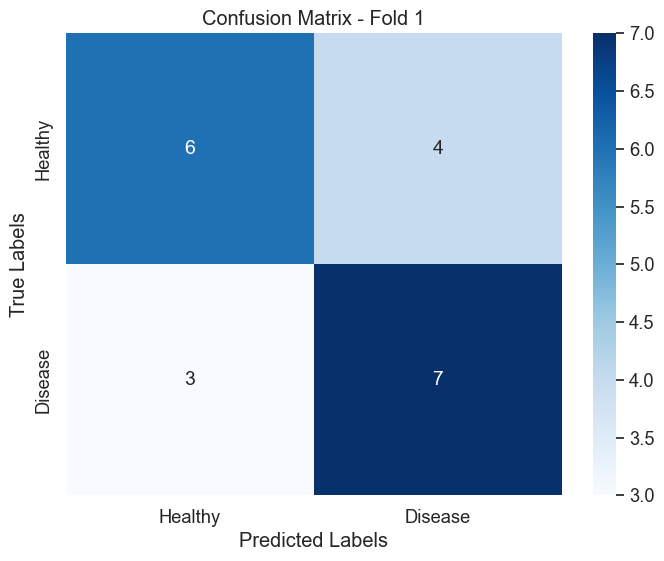

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.64      0.70      0.67        10

    accuracy                           0.65        20
   macro avg       0.65      0.65      0.65        20
weighted avg       0.65      0.65      0.65        20


Fold 2
Accuracy for Fold 2: 80.00%


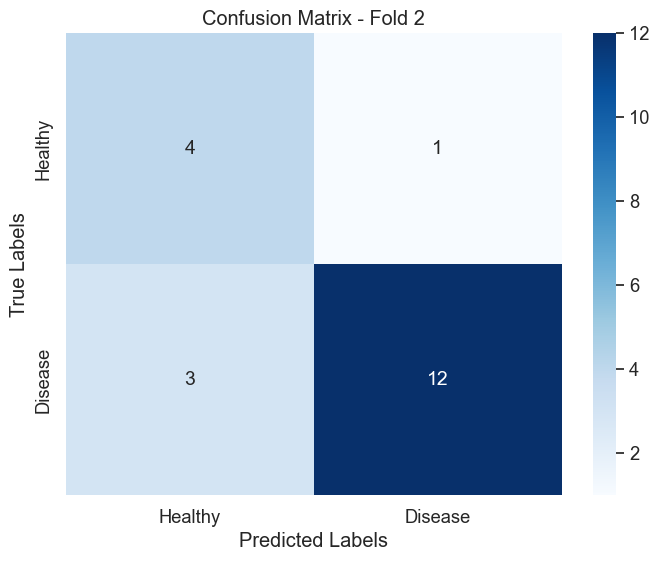

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.92      0.80      0.86        15

    accuracy                           0.80        20
   macro avg       0.75      0.80      0.76        20
weighted avg       0.84      0.80      0.81        20


Fold 3
Accuracy for Fold 3: 89.47%


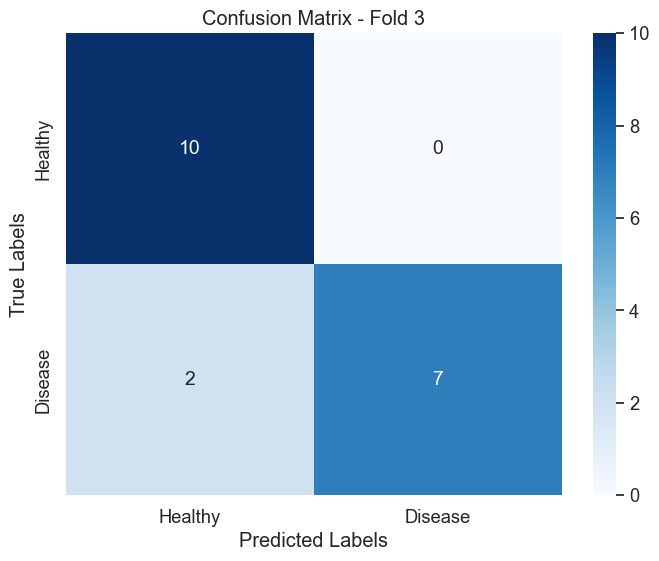

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.78      0.88         9

    accuracy                           0.89        19
   macro avg       0.92      0.89      0.89        19
weighted avg       0.91      0.89      0.89        19


Average Accuracy: 78.16%
Cross-Validation Scores: [0.7        0.75       0.94736842]
Average CV Score: 0.80


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.8, random_state=42)
cross_val_logistic_regression(X_train, y_train, n_splits=3)

50/50


Fold 1
Accuracy for Fold 1: 88.00%


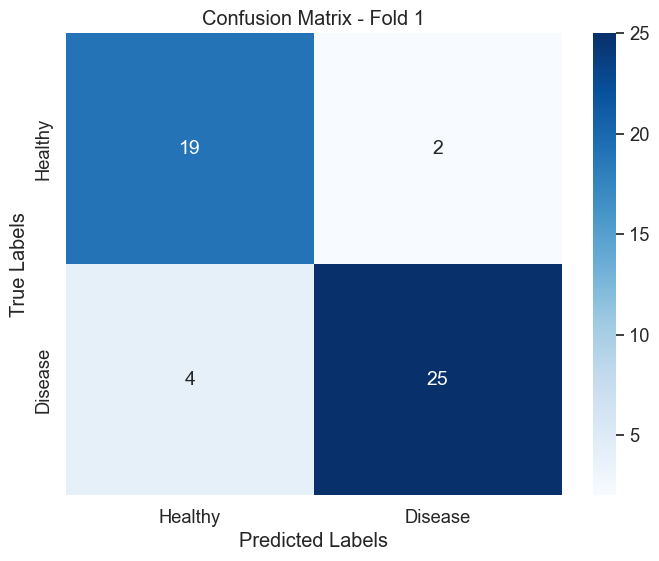

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        21
           1       0.93      0.86      0.89        29

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50


Fold 2
Accuracy for Fold 2: 83.67%


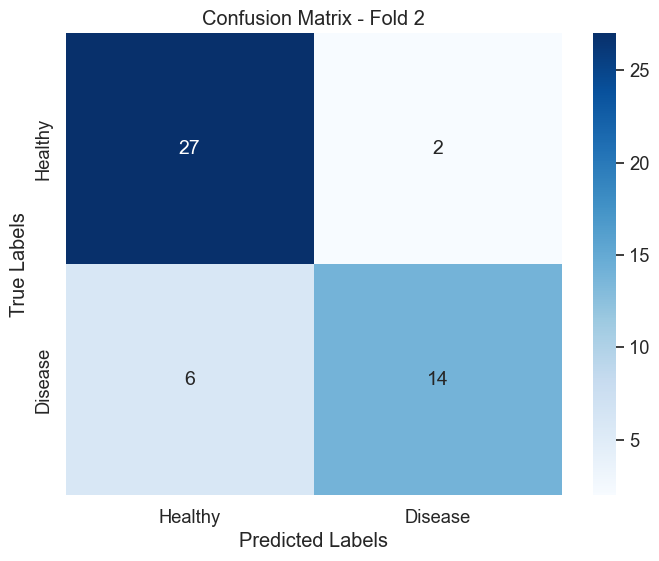

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.88      0.70      0.78        20

    accuracy                           0.84        49
   macro avg       0.85      0.82      0.82        49
weighted avg       0.84      0.84      0.83        49


Fold 3
Accuracy for Fold 3: 87.76%


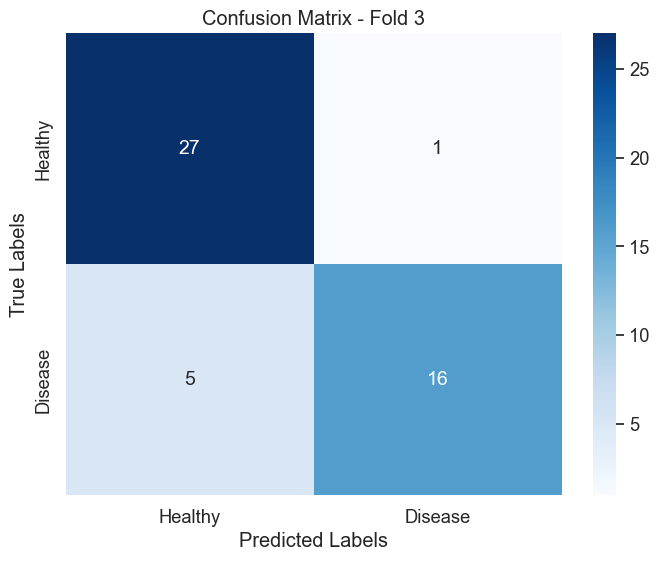

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        28
           1       0.94      0.76      0.84        21

    accuracy                           0.88        49
   macro avg       0.89      0.86      0.87        49
weighted avg       0.89      0.88      0.88        49


Average Accuracy: 86.48%
Cross-Validation Scores: [0.8        0.85714286 0.89795918]
Average CV Score: 0.85


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.5, random_state=42)
cross_val_logistic_regression(X_train, y_train, n_splits=3)

80/20


Fold 1
Accuracy for Fold 1: 87.34%


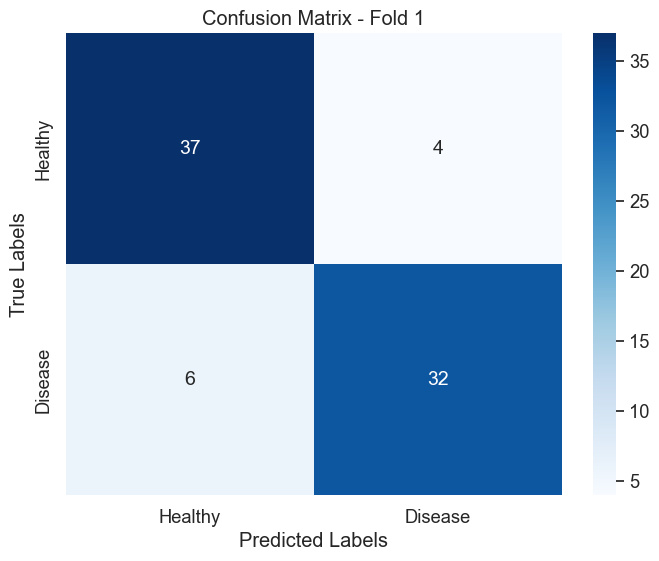

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        41
           1       0.89      0.84      0.86        38

    accuracy                           0.87        79
   macro avg       0.87      0.87      0.87        79
weighted avg       0.87      0.87      0.87        79


Fold 2
Accuracy for Fold 2: 73.42%


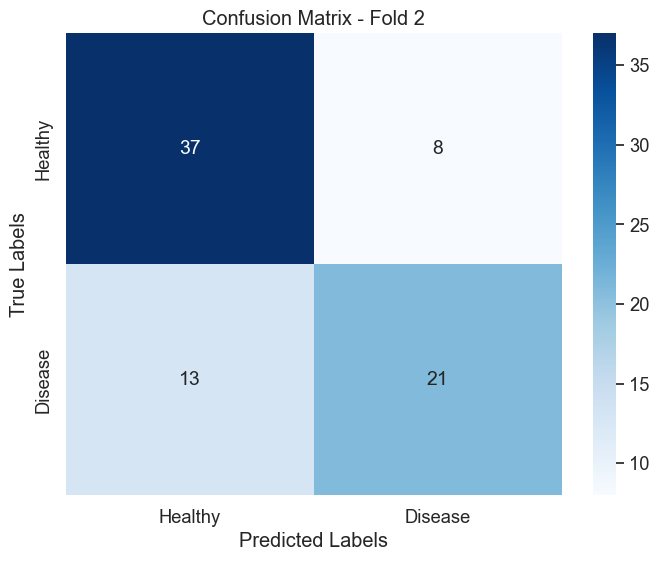

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        45
           1       0.72      0.62      0.67        34

    accuracy                           0.73        79
   macro avg       0.73      0.72      0.72        79
weighted avg       0.73      0.73      0.73        79


Fold 3
Accuracy for Fold 3: 84.81%


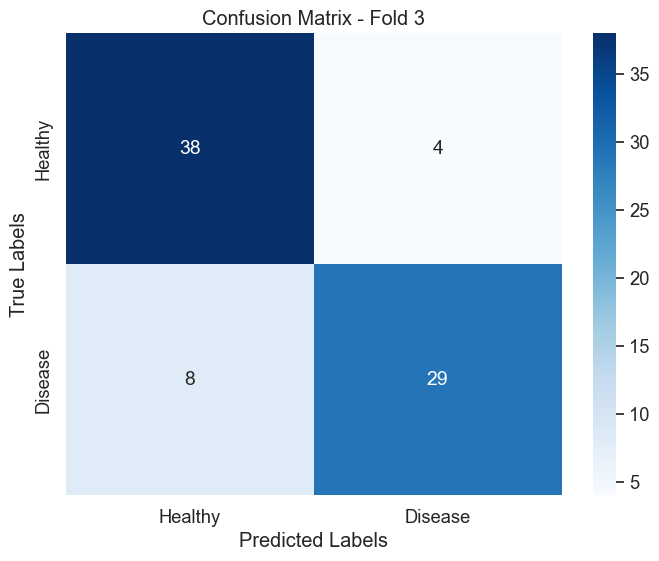

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        42
           1       0.88      0.78      0.83        37

    accuracy                           0.85        79
   macro avg       0.85      0.84      0.85        79
weighted avg       0.85      0.85      0.85        79


Average Accuracy: 81.86%
Cross-Validation Scores: [0.81012658 0.82278481 0.87341772]
Average CV Score: 0.84


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
cross_val_logistic_regression(X_train, y_train, n_splits=3)

**Parkinsons Data**

In [7]:
file_path = "parkinsons/parkinsons.data"
parkin_data = pd.read_csv(file_path, delimiter=",", header=0)
parkin_data.drop(columns=parkin_data.columns[0], inplace=True)

parkin_data.dropna(inplace=True)

correlation_matrix = parkin_data.corr()

upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
parkin_data_reduced = parkin_data.drop(columns=to_drop)
shuffled_park_data = parkin_data_reduced.sample(frac=1)
shuffled_park_data.reset_index(inplace = True, drop = True)

TargetVal = ['status']
feat_list = list(parkin_data_reduced.columns)
feat_list.remove('status')
Features = feat_list
X = shuffled_park_data[Features].values
Y = shuffled_park_data[TargetVal].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

20/80


Fold 1
Accuracy for Fold 1: 69.23%


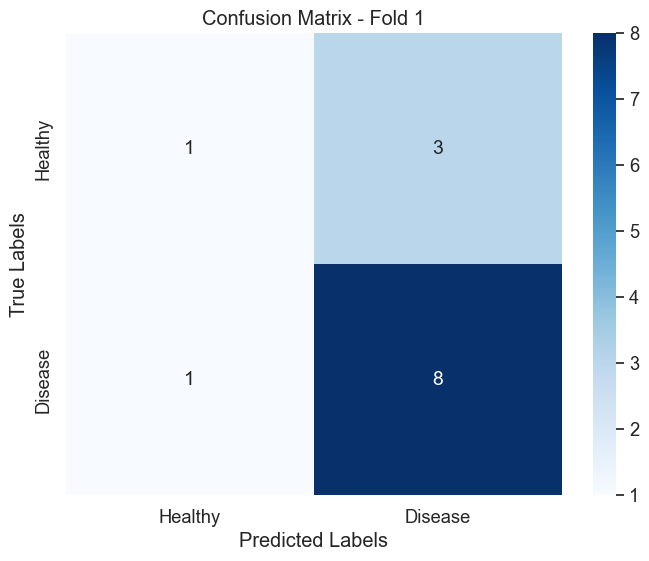

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.73      0.89      0.80         9

    accuracy                           0.69        13
   macro avg       0.61      0.57      0.57        13
weighted avg       0.66      0.69      0.66        13


Fold 2
Accuracy for Fold 2: 69.23%


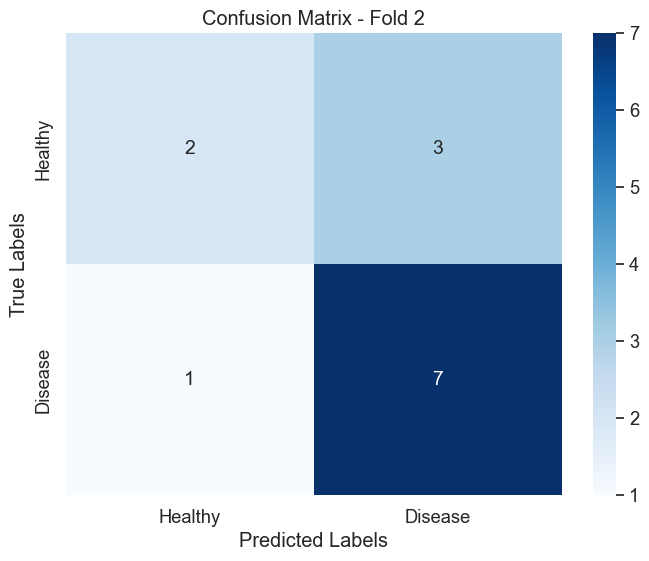

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.70      0.88      0.78         8

    accuracy                           0.69        13
   macro avg       0.68      0.64      0.64        13
weighted avg       0.69      0.69      0.67        13


Fold 3
Accuracy for Fold 3: 61.54%


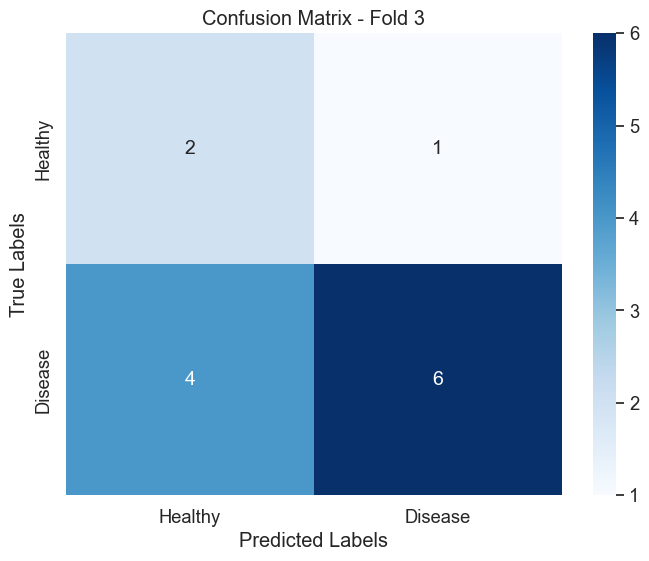

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.67      0.44         3
           1       0.86      0.60      0.71        10

    accuracy                           0.62        13
   macro avg       0.60      0.63      0.58        13
weighted avg       0.74      0.62      0.65        13


Average Accuracy: 66.67%
Cross-Validation Scores: [0.76923077 0.53846154 0.76923077]
Average CV Score: 0.69


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.8, random_state=42)
cross_val_logistic_regression(X_train, y_train, n_splits=3)

50/50


Fold 1
Accuracy for Fold 1: 87.88%


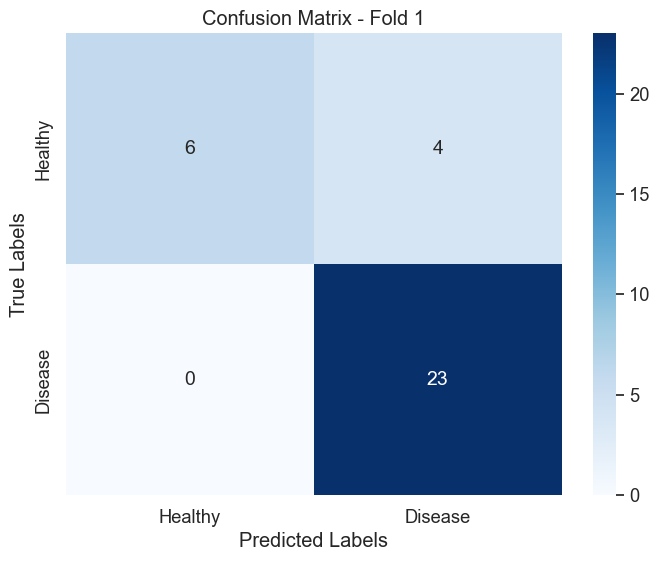

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.85      1.00      0.92        23

    accuracy                           0.88        33
   macro avg       0.93      0.80      0.83        33
weighted avg       0.90      0.88      0.87        33


Fold 2
Accuracy for Fold 2: 81.25%


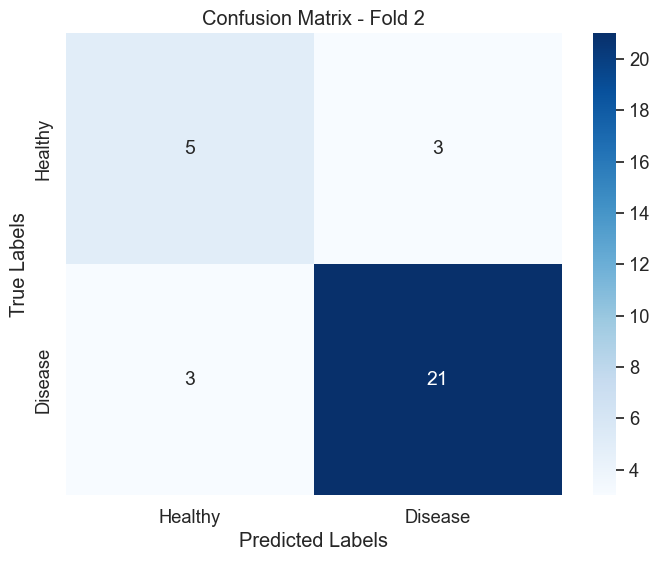

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.88      0.88      0.88        24

    accuracy                           0.81        32
   macro avg       0.75      0.75      0.75        32
weighted avg       0.81      0.81      0.81        32


Fold 3
Accuracy for Fold 3: 71.88%


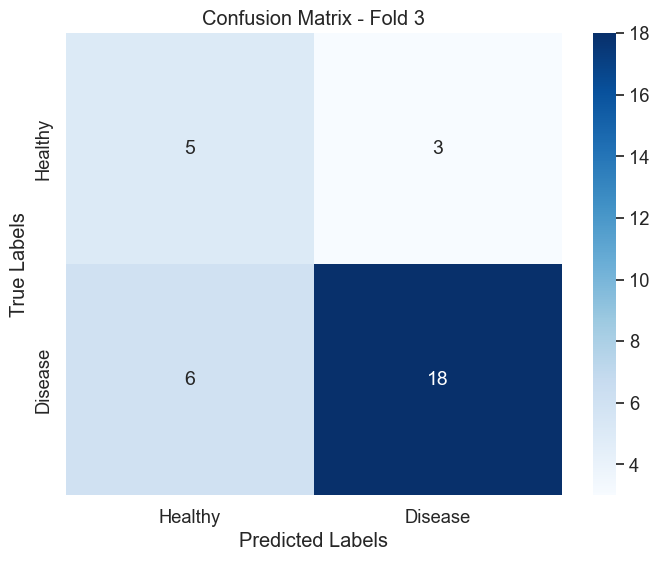

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.62      0.53         8
           1       0.86      0.75      0.80        24

    accuracy                           0.72        32
   macro avg       0.66      0.69      0.66        32
weighted avg       0.76      0.72      0.73        32


Average Accuracy: 80.33%
Cross-Validation Scores: [0.90909091 0.8125     0.71875   ]
Average CV Score: 0.81


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.5, random_state=42)
cross_val_logistic_regression(X_train, y_train, n_splits=3)

80/20


Fold 1
Accuracy for Fold 1: 78.85%


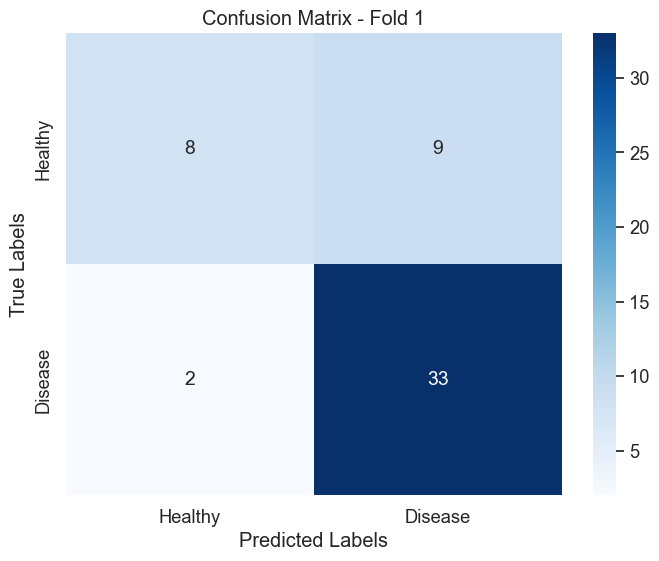

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.47      0.59        17
           1       0.79      0.94      0.86        35

    accuracy                           0.79        52
   macro avg       0.79      0.71      0.72        52
weighted avg       0.79      0.79      0.77        52


Fold 2
Accuracy for Fold 2: 78.85%


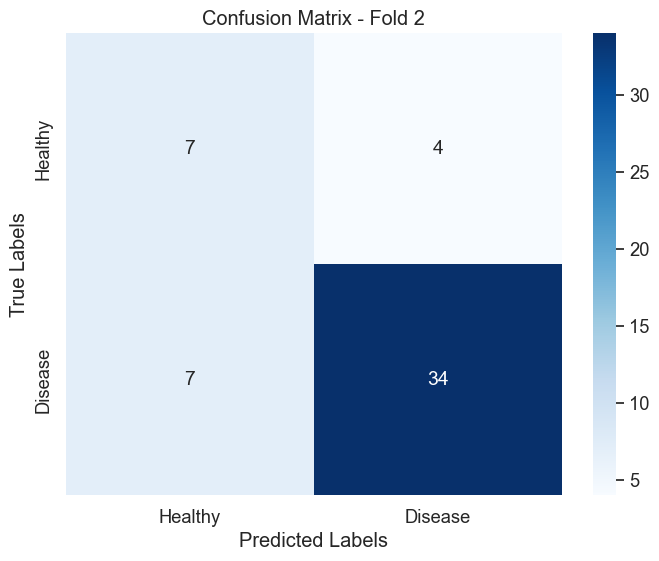

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.64      0.56        11
           1       0.89      0.83      0.86        41

    accuracy                           0.79        52
   macro avg       0.70      0.73      0.71        52
weighted avg       0.81      0.79      0.80        52


Fold 3
Accuracy for Fold 3: 88.46%


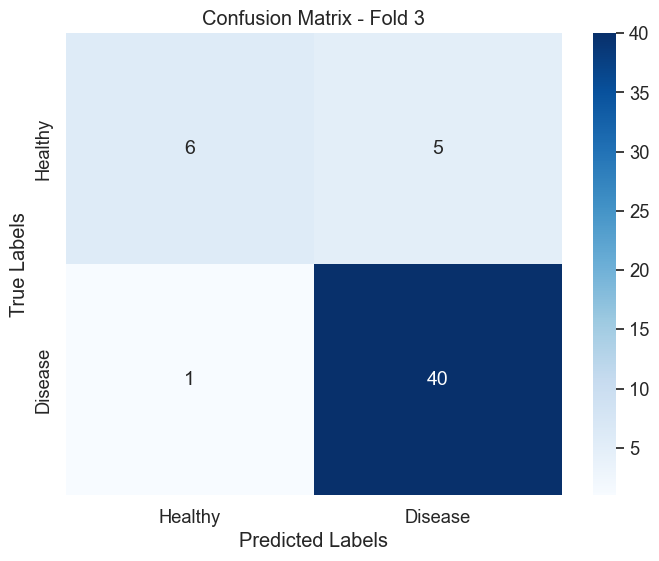

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.55      0.67        11
           1       0.89      0.98      0.93        41

    accuracy                           0.88        52
   macro avg       0.87      0.76      0.80        52
weighted avg       0.88      0.88      0.87        52


Average Accuracy: 82.05%
Cross-Validation Scores: [0.90384615 0.92307692 0.73076923]
Average CV Score: 0.85


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
cross_val_logistic_regression(X_train, y_train, n_splits=3)

**Breast Cancer Data**

In [11]:
file_path = "breast+cancer/breast-cancer.data"
column_names = ['class', 'age', 'menopause', 'tumor size', 'inv nodes', 'node capes', 'deg malig', 'breast', 'breast quad', 'irradiat'] 
print(len(column_names))
breast_data =  pd.read_csv(file_path, delimiter=",", header=None, names=column_names)

class_map = {'no-recurrence-events': 0, 'recurrence-events' : 1} #0 is healthy

age_mapping = {
    '10-19': 15,
    '20-29': 25,
    '30-39': 35,
    '40-49': 45,
    '50-59': 55,
    '60-69': 65,
    '70-79': 75,
    '80-89': 85,
    '90-99': 95
}
meno_mapping = {
    'lt40' : 0,
    'ge40' : 1,
    'premeno' : 2
}
size_mapping = {
'0-4' : 2,
'5-9' : 7,
'10-14' : 12,
'15-19' : 17,
'20-24' : 22,
'25-29' : 27,
'30-34' : 32,
'35-39' : 37,
'40-44' : 42,
'45-49' : 47,
'50-54' : 52,
'55-59' : 57
}

node_mapping = {
'0-2' : 2,
'3-5' : 5,
'6-8' : 8,
'9-11' : 11,
'12-14' : 14,
'15-17' : 17,
'18-20' : 20,
'21-23' : 23,
'24-26' : 26,
'27-29' : 29,
'30-32' : 32,
'33-35' : 35,
'36-39' : 39
}
y_n_map = {'yes': 0, 'no':1}
side_map = {'left': 0, 'right':1}
quad_map = {
'left_up' : 0,
'left_low' : 1,
'right_up' : 2,
'right_low' : 3,
'central' : 4,
}
breast_data['class'] = breast_data['class'].replace(class_map)
breast_data['age'] = breast_data['age'].replace(age_mapping)
breast_data['menopause'] = breast_data['menopause'].replace(meno_mapping)
breast_data['tumor size'] = breast_data['tumor size'].replace(size_mapping)
breast_data['inv nodes'] = breast_data['inv nodes'].replace(node_mapping)
breast_data['node capes'] = breast_data['node capes'].replace(y_n_map)
breast_data['breast'] = breast_data['breast'].replace(side_map)
breast_data['breast quad'] = breast_data['breast quad'].replace(quad_map)
breast_data['irradiat'] = breast_data['irradiat'].replace(y_n_map)

breast_data['node capes'] = pd.to_numeric(breast_data['node capes'], errors='coerce')
breast_data['breast quad'] = pd.to_numeric(breast_data['breast quad'], errors='coerce')

breast_data.dropna(inplace=True) #Dropped 9 entries, as Nan
# breast_data.info()

shuffled_breast_data = breast_data.sample(frac=1)
shuffled_breast_data.reset_index(inplace = True, drop = True)

Class = ['class']
feat_list = list(breast_data.columns)
feat_list.remove('class')
Features = feat_list

X = shuffled_breast_data[Features].values
Y = shuffled_breast_data[Class].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


10


/var/folders/1r/9xqq4jbj1bxc93bgtfzf_0w40000gn/T/ipykernel_92947/1718260179.py:63: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  breast_data['class'] = breast_data['class'].replace(class_map)
/var/folders/1r/9xqq4jbj1bxc93bgtfzf_0w40000gn/T/ipykernel_92947/1718260179.py:64: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  breast_data['age'] = breast_data['age'].replace(age_mapping)
/var/folders/1r/9xqq4jbj1bxc93bgtfzf_0w40000gn/T/ipykernel_92947/1718260179.py:65: FutureWarning: Downcasting behavior in `replace` is deprecated and will

20/80


Fold 1
Accuracy for Fold 1: 63.16%


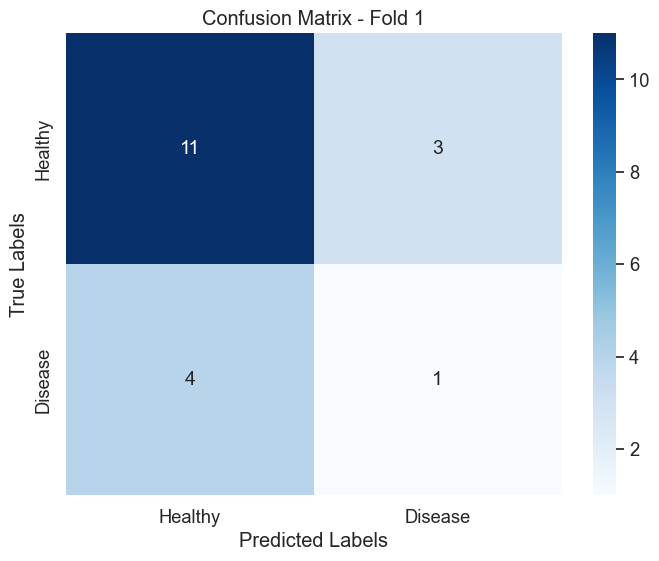

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        14
           1       0.25      0.20      0.22         5

    accuracy                           0.63        19
   macro avg       0.49      0.49      0.49        19
weighted avg       0.61      0.63      0.62        19


Fold 2
Accuracy for Fold 2: 77.78%


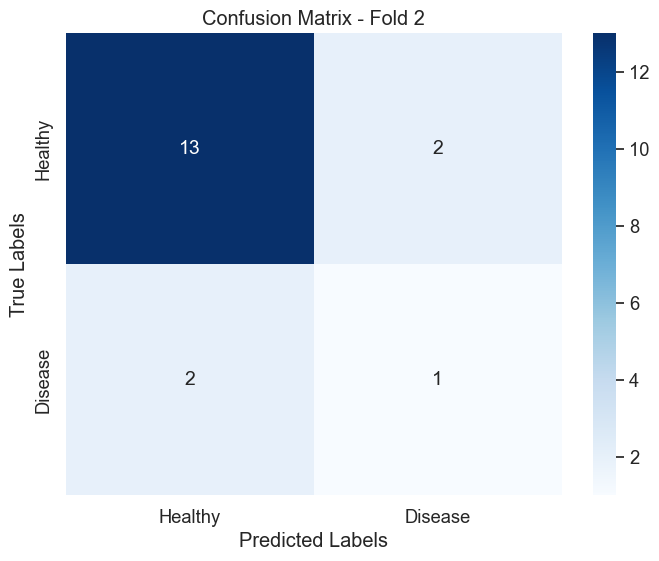

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.33      0.33      0.33         3

    accuracy                           0.78        18
   macro avg       0.60      0.60      0.60        18
weighted avg       0.78      0.78      0.78        18


Fold 3
Accuracy for Fold 3: 77.78%


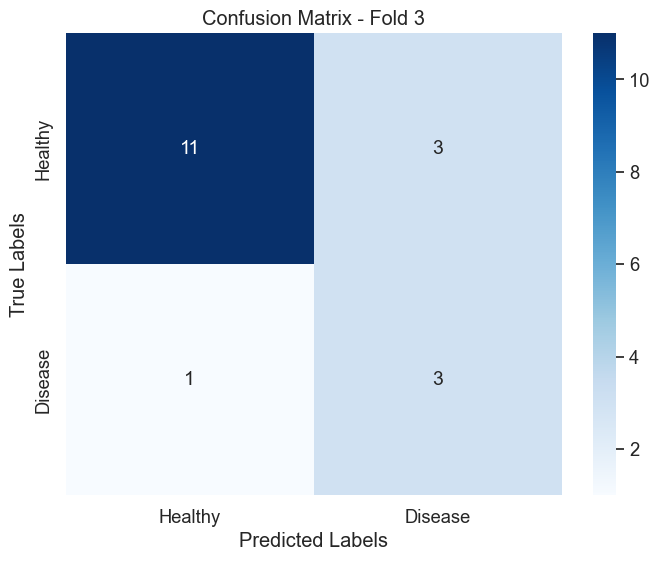

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.50      0.75      0.60         4

    accuracy                           0.78        18
   macro avg       0.71      0.77      0.72        18
weighted avg       0.82      0.78      0.79        18


Average Accuracy: 72.90%
Cross-Validation Scores: [0.84210526 0.77777778 0.72222222]
Average CV Score: 0.78


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.8, random_state=42)
cross_val_logistic_regression(X_train, y_train, n_splits=3)

50/50


Fold 1
Accuracy for Fold 1: 71.74%


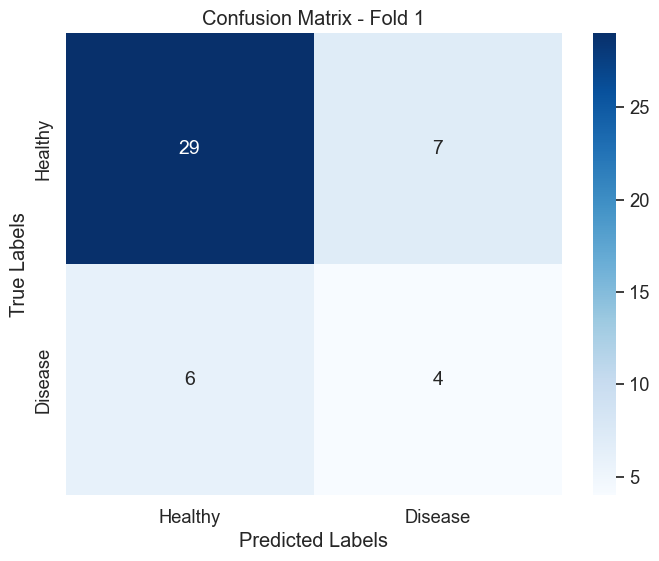

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        36
           1       0.36      0.40      0.38        10

    accuracy                           0.72        46
   macro avg       0.60      0.60      0.60        46
weighted avg       0.73      0.72      0.72        46


Fold 2
Accuracy for Fold 2: 78.26%


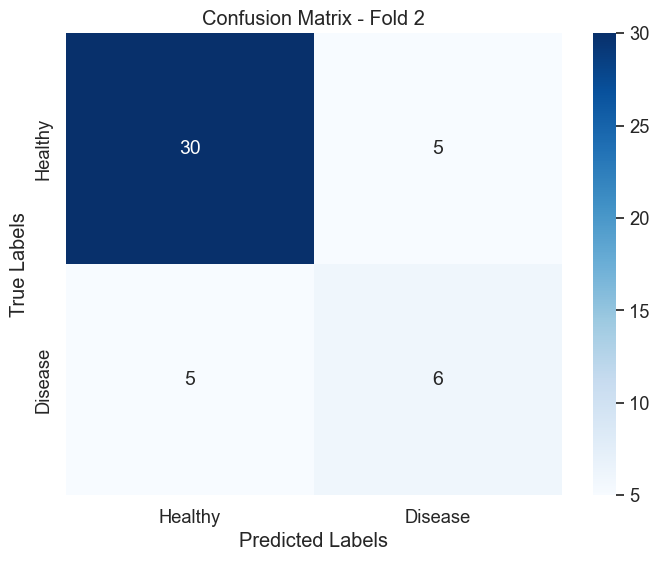

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        35
           1       0.55      0.55      0.55        11

    accuracy                           0.78        46
   macro avg       0.70      0.70      0.70        46
weighted avg       0.78      0.78      0.78        46


Fold 3
Accuracy for Fold 3: 67.39%


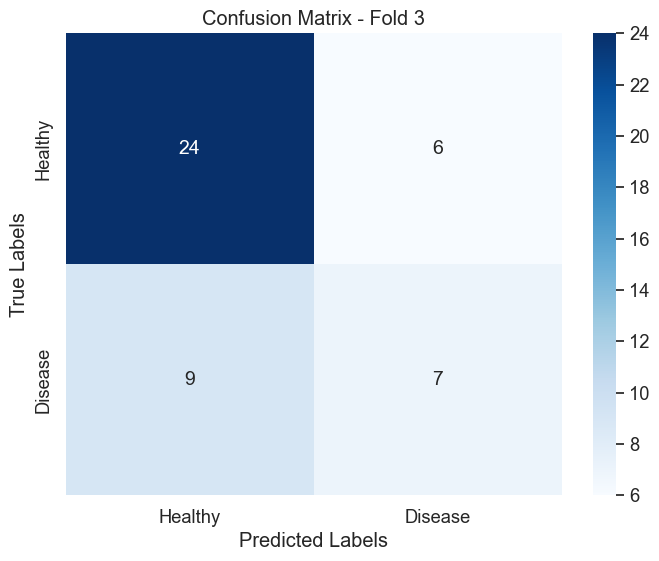

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        30
           1       0.54      0.44      0.48        16

    accuracy                           0.67        46
   macro avg       0.63      0.62      0.62        46
weighted avg       0.66      0.67      0.66        46


Average Accuracy: 72.46%
Cross-Validation Scores: [0.67391304 0.67391304 0.82608696]
Average CV Score: 0.72


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.5, random_state=42)
cross_val_logistic_regression(X_train, y_train, n_splits=3)

80/20


Fold 1
Accuracy for Fold 1: 75.68%


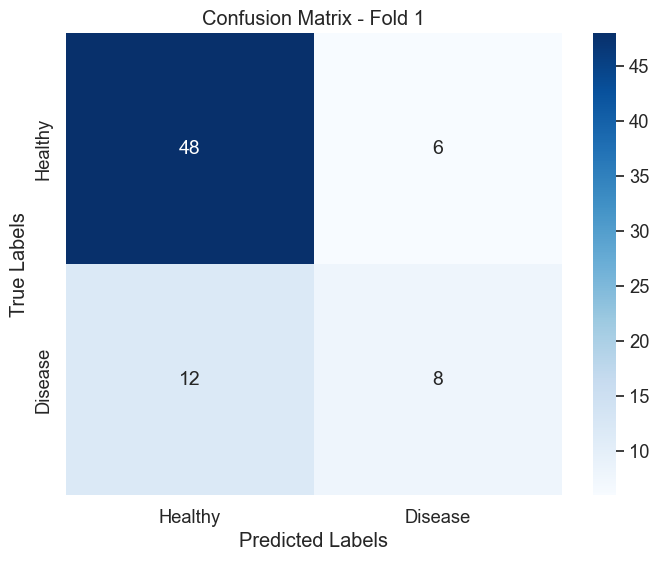

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        54
           1       0.57      0.40      0.47        20

    accuracy                           0.76        74
   macro avg       0.69      0.64      0.66        74
weighted avg       0.74      0.76      0.74        74


Fold 2
Accuracy for Fold 2: 67.57%


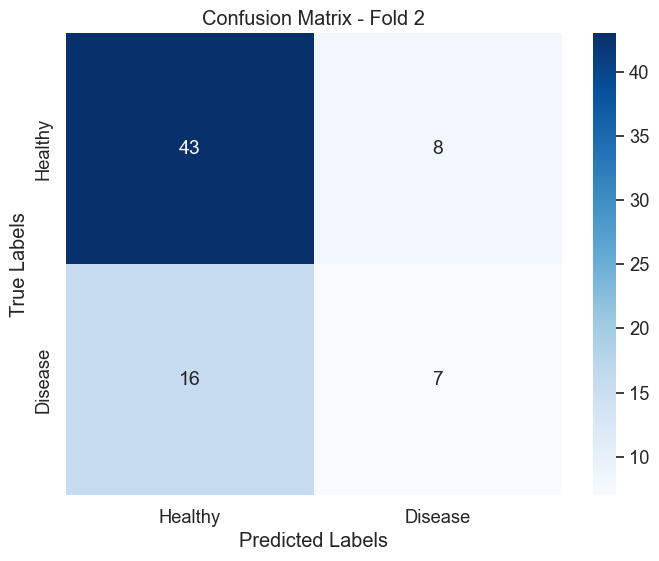

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        51
           1       0.47      0.30      0.37        23

    accuracy                           0.68        74
   macro avg       0.60      0.57      0.58        74
weighted avg       0.65      0.68      0.65        74


Fold 3
Accuracy for Fold 3: 78.08%


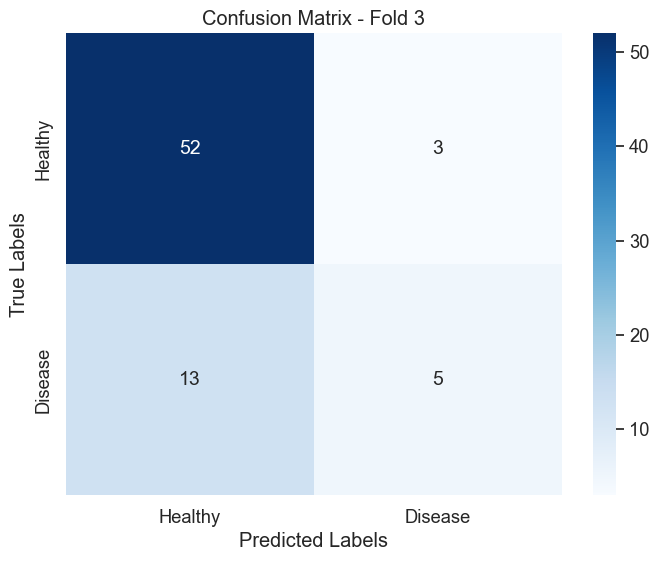

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        55
           1       0.62      0.28      0.38        18

    accuracy                           0.78        73
   macro avg       0.71      0.61      0.63        73
weighted avg       0.76      0.78      0.75        73


Average Accuracy: 73.78%
Cross-Validation Scores: [0.74324324 0.72972973 0.7260274 ]
Average CV Score: 0.73


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
cross_val_logistic_regression(X_train, y_train, n_splits=3)